In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
import scipy

In [99]:
# генератор случайных чисел 
import random as rd

value_list = []
rd.seed(1)
for _ in range(100):
    value = rd.random()
    value_list.append(value)
len(value_list)

df1 =pd.DataFrame()
df1['xi'] = value_list

df1 = df1.round({'xi':3})
df1.to_excel("Task_4_равномерн_величина.xlsx")
df1.head(10)

,xi
0,0.134
1,0.847
2,0.764
3,0.255
4,0.495
5,0.449
6,0.652
7,0.789
8,0.094
9,0.028


In [24]:
# посомтрим на основные парамеры распредления
df1['xi'].describe()

count    100.000000
mean       0.512330
std        0.285657
min        0.002000
25%        0.265500
50%        0.511000
75%        0.765750
max        0.993000
Name: xi, dtype: float64

In [25]:
# посомтрим на основные парамеры распредления _ cпособ 2
from scipy import stats   
desc = stats.describe(df1['xi']) 
print(desc)

DescribeResult(nobs=100, minmax=(0.002, 0.993), mean=0.5123300000000001, variance=0.08160012232323233, skewness=-0.13677599078039163, kurtosis=-1.0287765107464515)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000B421508>]],
      dtype=object)

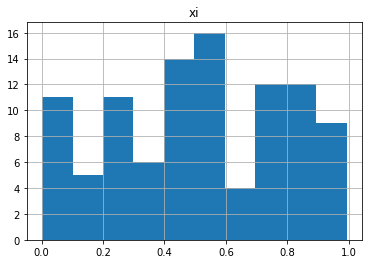

In [26]:
# построим гитограмму 
df1.hist()


In [27]:
# Основные характеристики полученных данных:

df_clear = df1.copy()

import statistics
# мат ожидание
M = np.var(df_clear['xi'])
# размах, 
raz = np.ptp(df_clear['xi'])
# среднее,
m = statistics.mean(df_clear['xi'])
# моду
mo = 1
# mo = statistics.mode(df_clear['xi'])

# медиану, 
me = statistics.median(df_clear['xi'])
# дисперсию, 
D = statistics.variance(df_clear['xi'])
# С.К.О., 
SKO = statistics.stdev(df_clear['xi'])
# коэффициент вариации,
Kv = df_clear['xi'].std()/df_clear['xi'].mean()
# коэффициенты асимметрии, 
As = scipy.stats.skew(df_clear['xi'])
# эксцесса
Ex = scipy.stats.kurtosis(df_clear['xi'])

print('Мат ожидание = {M},'.format(M = M))
print('Размах = {raz},\nCреднее = {m},\nМедиана = {me},\nМода = {mo}'.format(raz = raz,m=m,me=me,mo=mo))
print('Димперсия = {D},\nС.К.О. = {SKO},\nКоэффициент вариации = {Kv},\nКоэффициенты асимметрии = {As},\nЭксцесса = {Ex},'.format(D = D,SKO=SKO,Kv=Kv,As=As,Ex=Ex))
print('max = {max}, ,min = {min}'.format(max = max(df_clear['xi']), min = min(df_clear['xi'])))

Мат ожидание = 0.08078412109999998,
Размах = 0.991,
Cреднее = 0.51233,
Медиана = 0.511,
Мода = 1
Димперсия = 0.08160012232323233,
С.К.О. = 0.2856573512501163,
Коэффициент вариации = 0.5575651459998755,
Коэффициенты асимметрии = -0.13677599078039163,
Эксцесса = -1.0287765107464515,
max = 0.993, ,min = 0.002


In [28]:
# Теоретические характеристики:

a = 0
b = 1

import statistics
# мат ожидание
M = (b+a)/2
# размах, 
raz = b - a
# среднее,
m = (b+a)/2
# моду
mo = 1

# медиану, 
me = (b+a)/2
# дисперсию, 
D = (b+a)**2/12
# С.К.О., 
SKO = np.sqrt((b+a)**2/12)
# коэффициент вариации,
Kv = 1/np.sqrt(3)*(b-a)/(b+a)
# коэффициенты асимметрии, 
As = 0
# эксцесса
Ex = (b+a)/2

print('Мат ожидание = {M},'.format(M = M))
print('Размах = {raz},\nCреднее = {m},\nМедиана = {me},\nМода = {mo}'.format(raz = raz,m=m,me=me,mo=mo))
print('Димперсия = {D},\nС.К.О. = {SKO},\nКоэффициент вариации = {Kv},\nКоэффициенты асимметрии = {As},\nЭксцесса = {Ex},'.format(D = D,SKO=SKO,Kv=Kv,As=As,Ex=Ex))
print('max = {max}, ,min = {min}'.format(max = max(df_clear['xi']), min = min(df_clear['xi'])))

Мат ожидание = 0.5,
Размах = 1,
Cреднее = 0.5,
Медиана = 0.5,
Мода = 1
Димперсия = 0.08333333333333333,
С.К.О. = 0.28867513459481287,
Коэффициент вариации = 0.5773502691896258,
Коэффициенты асимметрии = 0,
Эксцесса = 0.5,
max = 0.993, ,min = 0.002


In [29]:
scipy.stats.uniform.fit(df1['xi'])

(0.002, 0.991)

In [30]:
scipy.stats.skew(df_clear['xi'])

-0.13677599078039163

# Проверим по Хи2

In [31]:
# фУНКЦИЯ
def MainParameter(df_clear) :

    # мат ожидание
    M = np.var(df_clear['xi'])
    # С.К.О., 
    SKO = statistics.stdev(df_clear['xi'])
    # размах, 
    raz = np.ptp(df_clear['xi'])


#     df_clear = pd.DataFrame()
#     df = pd.read_excel('Варианты заданий по темам 2-3.xlsx')
#     df_clear['xi'] = df['Вариант 1'].copy()

    # Сводный df
    df5 = pd.DataFrame()

    # 1 - cчитаем границы интервало
    interval_left = [] 
    interval_right = [] 

    dx = raz/10
    count_right = min(df_clear['xi']) 
    count_left = min(df_clear['xi'])
    start = min(df_clear['xi'])

    for i in range(10) :
        count_left = start + dx*i
        count_right = start + dx*(i+1)
        interval_left.append(round(float(count_left),3))
        interval_right.append(round(float(count_right),3))

    df5['interval_left'] = interval_left
    df5['interval_right'] = interval_right

    # 2 - посчитаем кол-во вхождений
    count_number = []
    lendf5 = len(df5['interval_left'])
    for i in range(lendf5) :   
        num = len(df_clear[(df_clear['xi'] >= df5['interval_left'][i]) & (df_clear['xi'] < df5['interval_right'][i])])
        if i == lendf5-1 :
            num = len(df_clear[(df_clear['xi'] >= df5['interval_left'][i]) & (df_clear['xi'] <= df5['interval_right'][i])])
        count_number.append(round(num,3))
    df5['count'] = count_number   

    # 3 - относительные частоты
    df5['wi'] = df5['count']/df5['count'].sum()
    df5 = df5.round({'wi':3})
    
    # 4 - посчитаем середину интервала
    count = len(df5['interval_left'])
    midle_list = []
    for i in range(count) :
        midle = (df5['interval_left'][i] + df5['interval_right'][i])/2
        midle_list.append(round(midle,3))    
    df5['midle_interval'] = midle_list

    # 7 - добавиил накопленые частоты
    lenf = len(df5['wi'])

    count = 0
    save_frequency = []
    wi = df5['count'].tolist()
    for i in range(lenf) :
        count = count + wi[i] 
        save_frequency.append(round(count,3))
    df5['Накоп_част'] = save_frequency

    # 8 - добавим относительные накопленые частоты
    V = df5['count'].sum()
    df5['Накоп_част/n'] = df5['Накоп_част']/V
    df5 = df5.round({'Накоп_част/n':3})
    return df5

In [32]:
# создали новый ДФ через функцию
a = pd.DataFrame()
a = MainParameter(df1)
a.head(100)

#5 - узнаем значенеи функции в середине интервала
value_norm_func = []
for i in range(a.shape[0]) :

    midle_interval = a['midle_interval'][i]

    x = midle_interval
    A_param = df1['xi'].min()
    B_param = df1['xi'].max()
#     y = scipy.stats.uniform.cdf(x, A_param, B_param)

    loc = A_param
    scale = B_param - A_param
    y = scipy.stats.uniform(loc, scale).cdf(x)
    
    value_norm_func.append(round(y,3))
    
    
a['pdf'] = value_norm_func

#6 - хочу добавить еще F(x) а не f(x)
value_norm_func_cdf = []

for i in range(a.shape[0]) :

    midle_interval = a['midle_interval'][i]

    x = midle_interval
    A_param = df1['xi'].min()
    B_param = df1['xi'].max()
#     y = scipy.stats.uniform.cdf(x, A_param, B_param)
    
    loc = A_param
    scale = B_param - A_param
    y = scipy.stats.uniform(loc, scale).cdf(x)
    
    value_norm_func_cdf.append(round(y,3))

a['cdf'] = value_norm_func_cdf

# 9 - умножили объем выьорки  на cdf
a['npi'] = a['cdf']*a['count'].sum()

# 10 - выпишем слогаемы для хи квадрат
a['Хи'] = ((a['Накоп_част'] - a['npi'])**2)/a['npi']
a =  a.round({'Хи':3})

# 11 - расчетное значение хи квадрат
Hi2 = a['Хи'].sum()
print('Hi2_imper =',round(Hi2,3),'\nHi2_crit =',11.1)
a.head(10)
# a.to_excel("Task_2_второй_расчет.xlsx")

Hi2_imper = 9.735 
Hi2_crit = 11.1


,interval_left,interval_right,count,wi,midle_interval,Накоп_част,Накоп_част/n,pdf,cdf,npi,Хи
0,0.002,0.101,11,0.11,0.052,11,0.11,0.050,0.050,5.0,7.200
1,0.101,0.200,5,0.05,0.151,16,0.16,0.150,0.150,15.0,0.067
2,0.200,0.299,11,0.11,0.250,27,0.27,0.250,0.250,25.0,0.160
3,0.299,0.398,6,0.06,0.349,33,0.33,0.350,0.350,35.0,0.114
4,0.398,0.497,14,0.14,0.448,47,0.47,0.450,0.450,45.0,0.089
5,0.497,0.597,16,0.16,0.547,63,0.63,0.550,0.550,55.0,1.164
6,0.597,0.696,4,0.04,0.646,67,0.67,0.650,0.650,65.0,0.062
7,0.696,0.795,12,0.12,0.746,79,0.79,0.751,0.751,75.1,0.203
8,0.795,0.894,12,0.12,0.844,91,0.91,0.850,0.850,85.0,0.424
9,0.894,0.993,9,0.09,0.944,100,1.00,0.951,0.951,95.1,0.252


Проверим по Калмагорову

In [33]:
# тоже самое для критерия калмагорова
# Вычтем 2 столбца
list_freq = (a['Накоп_част/n'] - a['cdf']).tolist()
list_freq = [round(abs(x),3) for x in list_freq]
print('Расчетное значение критерия',max(list_freq))

# уровень значимости 
# Область принятия гипотезы
alpha = 0.05

K1_alpha = np.sqrt(-0.5*np.log2(alpha))
count_f = a['Накоп_част/n'].sum()
print('Итоговый интервал принятия гипотезы (0, {K1_alpha})'.format(K1_alpha = K1_alpha*1/count_f))

Расчетное значение критерия 0.08
Итоговый интервал принятия гипотезы (0, 0.27528497840512556)


(array([1.10998991, 0.50454087, 1.10998991, 0.60544904, 1.41271443,
        1.61453078, 0.40363269, 1.21089808, 1.21089808, 0.90817356]),
 array([0.002 , 0.1011, 0.2002, 0.2993, 0.3984, 0.4975, 0.5966, 0.6957,
        0.7948, 0.8939, 0.993 ]),
 <a list of 10 Patch objects>)

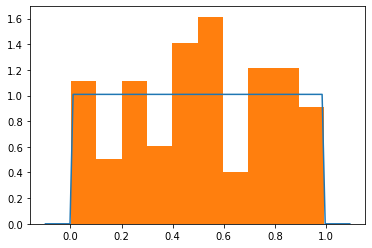

In [34]:
lambd = df1['xi'].mean()

x = np.linspace(df1['xi'].min()-0.1,df1['xi'].max()+0.1,100)
a = df1['xi'].min()
s = df1['xi'].max() - df1['xi'].min()
y = scipy.stats.uniform(a,s).pdf(x)

plt.plot(x,y)
plt.hist(df1['xi'], density=1)

In [35]:
# # chi-squared test with similar proportions
# from scipy.stats import chi2_contingency
# from scipy.stats import chi2
# # contingency table
# table = [[10, 20, 30],[6,  9,  17]]
# print(table)

# stat, p, dof, expected = chi2_contingency(table) 

# print('dof=%d' % dof)
# print(expected)

# # interpret test-statistic
# prob = 0.95
# critical = chi2.ppf(prob, dof)

# print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

# if abs(stat) >= critical:
# 	print('Dependent (reject H0)')
# else:
# 	print('Independent (fail to reject H0)')
    
# # interpret p-value
# alpha = 1.0 - prob
# print('significance=%.3f, p=%.3f' % (alpha, p))
# if p <= alpha:
# 	print('Dependent (reject H0)')
# else:
# 	print('Independent (fail to reject H0)')

# Экспоненциальное распределение

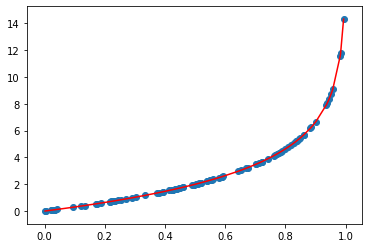

In [100]:
# методом взятия обратной функции получим
def inverse_f(x, Lambda): 
    y = -(1/Lambda)*np.log2(1-x)
    return y

# записили в датафрейм 
df2 = pd.DataFrame()
df2['xi'] = df1['xi'].sort_values(kind='quicksort')
df2['yi'] = inverse_f(df1['xi'], 0.5)

# построили график
x = df2['xi']
y = df2['yi']

plt.plot(x,y, color='red')
plt.scatter(x,y)

df2.to_excel("Task_4_эксп_величина.xlsx")

,xi,yi
13,0.002,0.005777
91,0.006,0.017364
35,0.021,0.061238
20,0.025,0.073052
9,0.028,0.081944


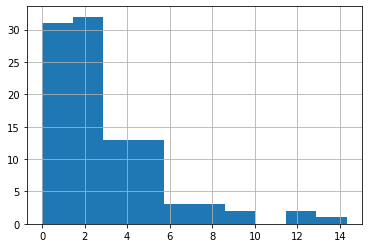

In [37]:
# оценка качетсва распредления
df2['yi'].hist()
df2.head()

In [38]:
# основные характеристики
df2['yi'].describe()

count    100.000000
mean       2.917546
std        2.755098
min        0.005777
25%        0.890429
50%        2.064242
75%        4.188002
max       14.316859
Name: yi, dtype: float64

In [39]:
# еще основные характеристики
print(stats.describe(df2['yi']) )

DescribeResult(nobs=100, minmax=(0.005776558649653023, 14.316858725208963), mean=2.917546153730604, variance=7.590562721003264, skewness=1.6856987768318414, kurtosis=3.274234383190672)


In [74]:
# Основные характеристики полученных данных:

df_clear['xi'] = df2['yi']

import statistics
# мат ожидание
M = np.var(df_clear['xi'])
# размах, 
raz = np.ptp(df_clear['xi'])
# среднее,
m = statistics.mean(df_clear['xi'])
# моду
# mo = statistics.mode(df_clear['xi'])

# медиану, 
me = statistics.median(df_clear['xi'])
# дисперсию, 
D = statistics.variance(df_clear['xi'])
# С.К.О., 
SKO = statistics.stdev(df_clear['xi'])
# коэффициент вариации,
Kv = df_clear['xi'].std()/df_clear['xi'].mean()
# коэффициенты асимметрии, 
As = scipy.stats.skew(df_clear['xi'])
# эксцесса
Ex = scipy.stats.kurtosis(df_clear['xi'])

print('Мат ожидание = {M},'.format(M = M))
print('Размах = {raz},\nCреднее = {m},\nМедиана = {me},\nМода = {mo}'.format(raz = raz,m=m,me=me,mo=mo))
print('Димперсия = {D},\nС.К.О. = {SKO},\nКоэффициент вариации = {Kv},\nКоэффициенты асимметрии = {As},\nЭксцесса = {Ex},'.format(D = D,SKO=SKO,Kv=Kv,As=As,Ex=Ex))
print('max = {max}, ,min = {min}'.format(max = max(df_clear['xi']), min = min(df_clear['xi'])))

Мат ожидание = 7.514657093793233,
Размах = 14.31108216655931,
Cреднее = 2.9175461537306036,
Медиана = 2.0642415603791533,
Мода = 1111
Димперсия = 7.590562721003264,
С.К.О. = 2.755097588290343,
Коэффициент вариации = 0.9443201386094473,
Коэффициенты асимметрии = 1.6856987768318428,
Эксцесса = 3.2742343831906773,
max = 14.316858725208963, ,min = 0.005776558649653023


In [90]:
# Теоретические характеристики:

b = 2

# мат ожидание
M2 = 1111
# размах, 
raz2 = 1111
# среднее,
m2 = b
# моду
mo2 = 1111

# медиану, 
me2 = b*0.6931
# дисперсию, 
D2 = b**2
# С.К.О., 
SKO2 = b
# коэффициент вариации,
Kv2 = 1
# коэффициенты асимметрии, 
As2 = 2
# эксцесса
Ex2 = 9

In [91]:
print('Мат ожидание = {M},'.format(M = M))
print('Размах = {raz},\nCреднее = {m},\nМедиана = {me},\nМода = {mo}'.format(raz = raz2,m=m2,me=me2,mo=mo2))
print('Димперсия = {D},\nС.К.О. = {SKO},\nКоэффициент вариации = {Kv},\nКоэффициенты асимметрии = {As},\nЭксцесса = {Ex},'.format(D = D2,SKO=SKO2,Kv=Kv2,As=As2,Ex=Ex2))
# print('max = {max}, ,min = {min}'.format(max = max(df_clear['xi']), min = min(df_clear['xi'])))

Мат ожидание = 7.514657093793233,
Размах = 1111,
Cреднее = 2,
Медиана = 1.3862,
Мода = 1111
Димперсия = 4,
С.К.О. = 2,
Коэффициент вариации = 1,
Коэффициенты асимметрии = 2,
Эксцесса = 9,


# Проверим и эту по критериям

In [95]:
# создали новый ДФ через функцию
b = pd.DataFrame()
temp_df = pd.DataFrame()
temp_df['xi'] = df2['yi']
b = MainParameter(temp_df)
b.head(100)

,interval_left,interval_right,count,wi,midle_interval,Накоп_част,Накоп_част/n
0,0.006,1.437,30,0.303,0.722,30,0.303
1,1.437,2.868,32,0.323,2.152,62,0.626
2,2.868,4.299,13,0.131,3.584,75,0.758
3,4.299,5.730,13,0.131,5.014,88,0.889
4,5.730,7.161,3,0.030,6.446,91,0.919
5,7.161,8.592,3,0.030,7.876,94,0.949
6,8.592,10.024,2,0.020,9.308,96,0.970
7,10.024,11.455,0,0.000,10.740,96,0.970
8,11.455,12.886,2,0.020,12.170,98,0.990
9,12.886,14.317,1,0.010,13.602,99,1.000


In [96]:


#5 - узнаем значенеи функции в середине интервала
value_norm_func = []
for i in range(b.shape[0]) :

    midle_interval = b['midle_interval'][i]

    x = midle_interval
    A_param = df2['yi'].min()
    B_param = df2['yi'].max()
#     y = scipy.stats.uniform.cdf(x, A_param, B_param)

    loc, scale = scipy.stats.expon.fit(df2['yi'], floc=0)
    y = scipy.stats.expon(loc,scale=scale).pdf(x)

    
    value_norm_func.append(round(y,3))
    
    
b['pdf'] = value_norm_func

#6 - хочу добавить еще F(x) а не f(x)
value_norm_func_cdf = []

for i in range(b.shape[0]) :

    midle_interval = b['midle_interval'][i]

    x = midle_interval
    A_param = df2['xi'].min()
    B_param = df2['xi'].max()
#     y = scipy.stats.uniform.cdf(x, A_param, B_param)
    
    loc, scale = scipy.stats.expon.fit(df2['yi'], floc=0)
    y = scipy.stats.expon(loc,scale=scale).cdf(x)

    
    value_norm_func_cdf.append(round(y,3))

b['cdf'] = value_norm_func_cdf

# 9 - умножили объем выьорки  на cdf
b['npi'] = b['cdf']*b['count'].sum()

# 10 - выпишем слогаемы для хи квадрат
b['Хи'] = ((b['Накоп_част'] - b['npi'])**2)/b['npi']
b =  b.round({'Хи':3})

# 11 - расчетное значение хи квадрат
Hi2 = b['Хи'].sum()
print('Hi2_imper =',round(Hi2,3),'\nHi2_crit =',11.1)
b.head(100)
# a.to_excel("Task_2_второй_расчет.xlsx")

Hi2_imper = 6.317 
Hi2_crit = 11.1


,interval_left,interval_right,count,wi,midle_interval,Накоп_част,Накоп_част/n,pdf,cdf,npi,Хи
0,0.006,1.437,30,0.303,0.722,30,0.303,0.268,0.219,21.681,3.192
1,1.437,2.868,32,0.323,2.152,62,0.626,0.164,0.522,51.678,2.062
2,2.868,4.299,13,0.131,3.584,75,0.758,0.100,0.707,69.993,0.358
3,4.299,5.730,13,0.131,5.014,88,0.889,0.061,0.821,81.279,0.556
4,5.730,7.161,3,0.030,6.446,91,0.919,0.038,0.890,88.110,0.095
5,7.161,8.592,3,0.030,7.876,94,0.949,0.023,0.933,92.367,0.029
6,8.592,10.024,2,0.020,9.308,96,0.970,0.014,0.959,94.941,0.012
7,10.024,11.455,0,0.000,10.740,96,0.970,0.009,0.975,96.525,0.003
8,11.455,12.886,2,0.020,12.170,98,0.990,0.005,0.985,97.515,0.002
9,12.886,14.317,1,0.010,13.602,99,1.000,0.003,0.991,98.109,0.008


In [97]:
# тоже самое для критерия калмагорова
# Вычтем 2 столбца
list_freq = (b['Накоп_част/n'] - b['cdf']).tolist()
list_freq = [round(abs(x),3) for x in list_freq]
print('Расчетное значение критерия',max(list_freq))

# уровень значимости 
# Область принятия гипотезы
alpha = 0.05

K1_alpha = np.sqrt(-0.5*np.log2(alpha))
count_f = b['Накоп_част/n'].sum()
print('Итоговый интервал принятия гипотезы (0, {K1_alpha})'.format(K1_alpha = K1_alpha*1/count_f))

Расчетное значение критерия 0.104
Итоговый интервал принятия гипотезы (0, 0.17554594992636377)


2.9175461537306044


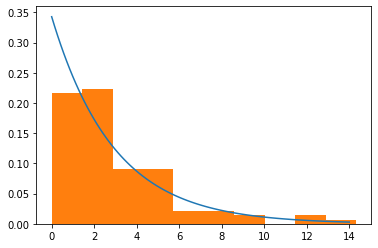

In [98]:
# обучим модель
loc, scale = scipy.stats.expon.fit(df2['yi'], floc=0)

# постриом гарфики

lambd = df2['yi'].mean()

x = np.linspace(0,14,100)
y = scipy.stats.expon(loc,scale=scale).pdf(x)

plt.plot(x,y)
plt.hist(df2['yi'], density=1)
print(lambd)

# scipy.stats.chisquare(f_obs  = df2['yi'], f_exp = y, ddof = 5)



In [43]:
loc, scale = scipy.stats.expon.fit(df2['yi'], floc=0)
round(scale,3)



2.918

Мат ожидание = 0,
Cреднее =    interval_left  interval_right  count    wi  midle_interval  Накоп_част  \
0          0.006           1.419     31  0.31           0.712          31   
1          1.419           2.832     32  0.32           2.125          63   
2          2.832           4.245     12  0.12           3.538          75   
3          4.245           5.657     12  0.12           4.951          87   
4          5.657           7.070      5  0.05           6.364          92   
5          7.070           8.483      3  0.03           7.776          95   
6          8.483           9.896      2  0.02           9.190          97   
7          9.896          11.309      0  0.00          10.602          97   
8         11.309          12.722      2  0.02          12.016          99   
9         12.722          14.135      1  0.01          13.428         100   

   Накоп_част/n    pdf    cdf   npi     Хи  
0          0.31  0.269  0.217  21.7  3.986  
1          0.63  0.165  0.517  51.